<a href="https://colab.research.google.com/github/AkkiAT/AT/blob/main/StockProcePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

**Loading Data**

In [3]:
df = pd.read_csv('/content/ADANIPORTS.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [5]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [6]:
df.shape

(3322, 15)

In [7]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [8]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

Text(0, 0.5, 'Count')

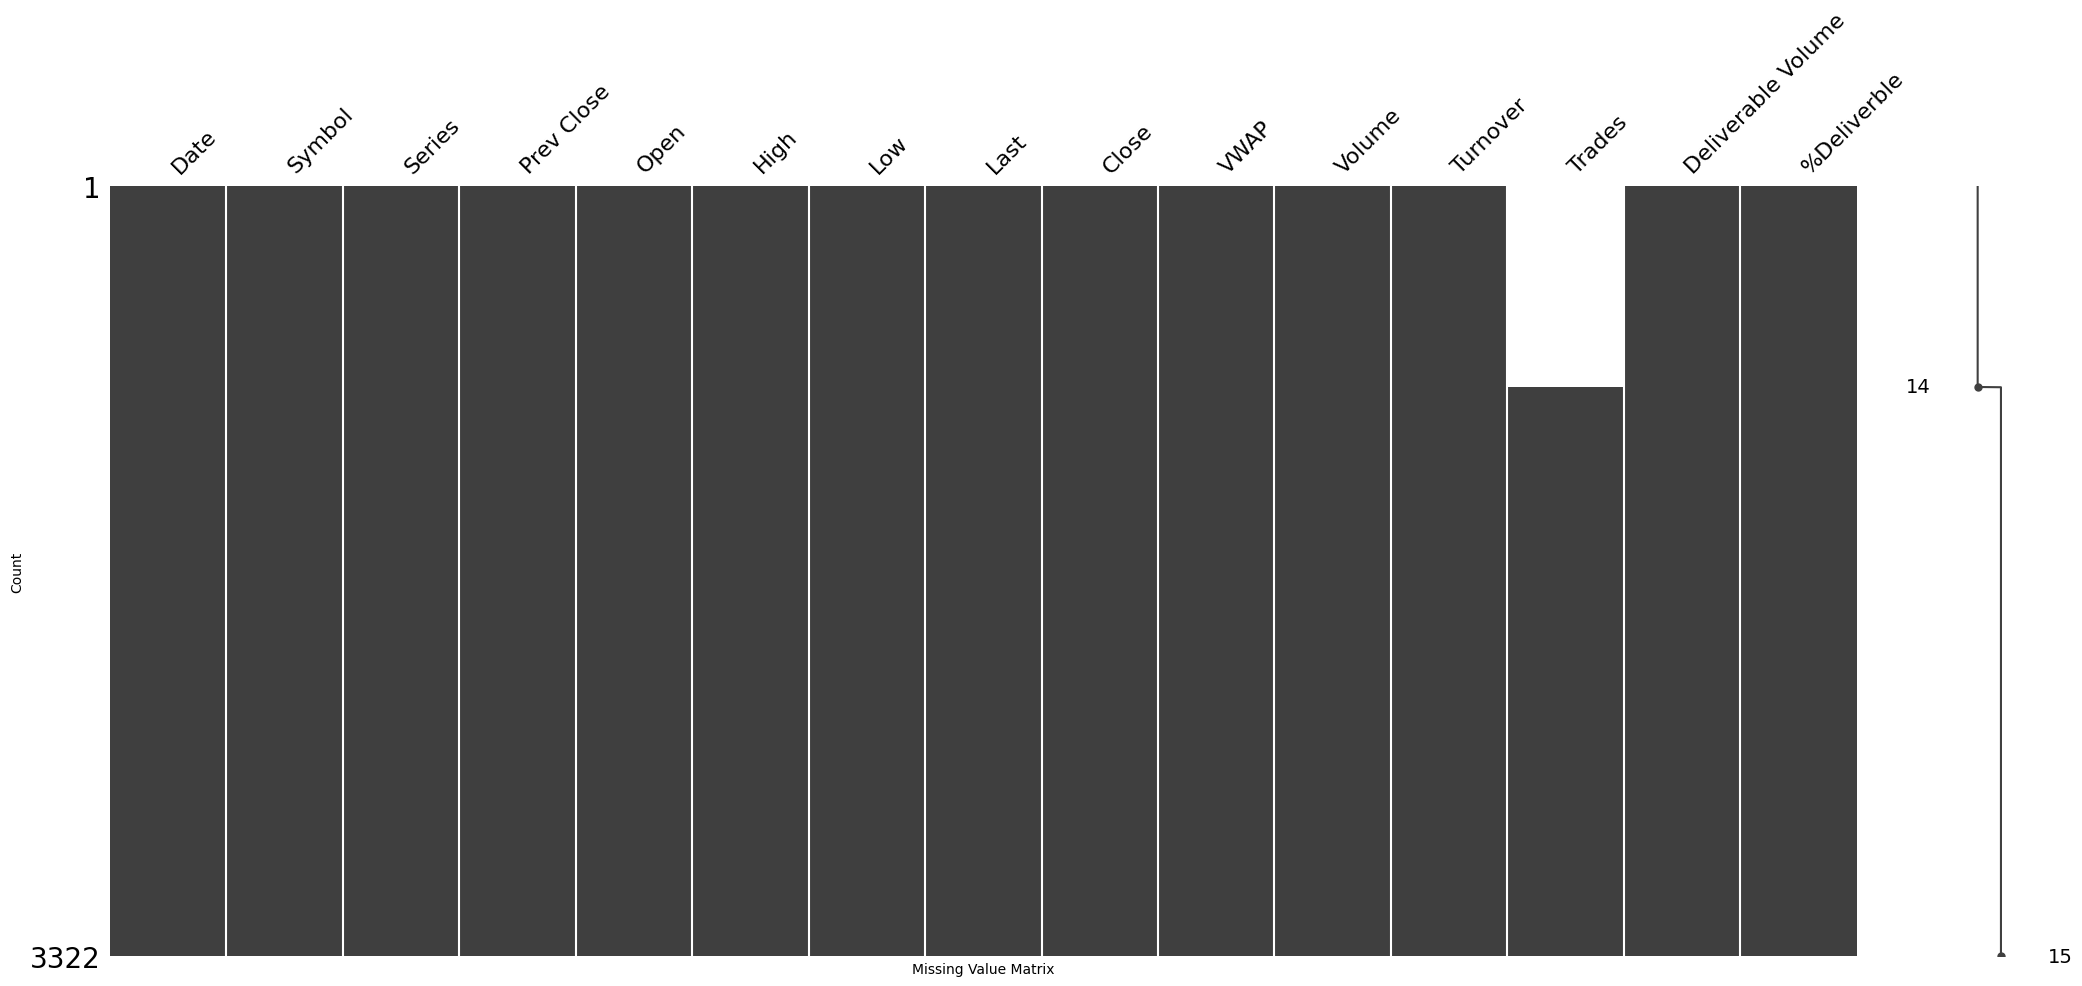

In [9]:
import missingno as msno
msno.matrix(df)
plt.xlabel('Missing Value Matrix')
plt.ylabel('Count')

In [13]:
stockprice_one_year = df[(df['Date']>'2011.03.31')&(df['Date']<'2012.04.01')]
stockprice_one_year.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1011,2012-01-02,MUNDRAPORT,EQ,120.05,122.80,123.75,111.0,115.0,114.70,115.90,1572363,1.822399e+13,20505.0,408586,0.2599
1012,2012-01-03,MUNDRAPORT,EQ,114.70,117.50,120.90,115.0,119.6,120.30,118.97,1385662,1.648520e+13,17541.0,651310,0.4700
1013,2012-01-04,MUNDRAPORT,EQ,120.30,121.00,123.50,118.0,122.7,122.85,120.33,1259249,1.515310e+13,10912.0,722926,0.5741
1014,2012-01-05,MUNDRAPORT,EQ,122.85,122.00,127.60,121.3,127.0,126.70,125.30,788405,9.878425e+12,10614.0,315199,0.3998
1015,2012-01-06,MUNDRAPORT,EQ,126.70,126.25,128.75,124.3,127.0,127.70,126.44,1036623,1.310736e+13,11658.0,401367,0.3872


In [14]:
stockprice_one_year.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [15]:
stockprice_one_year.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,2.510000e+02,251.000000,2.510000e+02,251.000000
mean,126.971713,127.110558,129.536255,124.545418,126.957171,127.031275,127.067131,1.249334e+06,1.589953e+13,14506.569721,6.782246e+05,0.504702
std,10.481418,10.786215,10.995367,10.153545,10.445331,10.484404,10.515293,9.434564e+05,1.209791e+13,9069.699698,6.179199e+05,0.136432
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.921800e+04,2.415857e+11,366.000000,5.383000e+03,0.168500
25%,119.700000,119.175000,121.875000,117.125000,119.575000,119.700000,119.340000,6.310935e+05,8.061242e+12,8346.500000,2.782465e+05,0.399150
50%,125.350000,125.500000,127.950000,123.550000,125.350000,125.400000,125.630000,1.031669e+06,1.289988e+13,12370.000000,4.915980e+05,0.499100
75%,132.500000,132.850000,136.000000,130.150000,132.450000,132.750000,133.235000,1.576300e+06,2.071907e+13,18298.000000,8.384755e+05,0.593650
max,155.400000,155.750000,157.750000,150.650000,155.400000,155.400000,153.760000,5.833743e+06,7.891366e+13,62246.000000,3.530898e+06,0.868200


In [16]:
stockprice_one_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 1011 to 1261
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                251 non-null    object 
 1   Symbol              251 non-null    object 
 2   Series              251 non-null    object 
 3   Prev Close          251 non-null    float64
 4   Open                251 non-null    float64
 5   High                251 non-null    float64
 6   Low                 251 non-null    float64
 7   Last                251 non-null    float64
 8   Close               251 non-null    float64
 9   VWAP                251 non-null    float64
 10  Volume              251 non-null    int64  
 11  Turnover            251 non-null    float64
 12  Trades              251 non-null    float64
 13  Deliverable Volume  251 non-null    int64  
 14  %Deliverble         251 non-null    float64
dtypes: float64(10), int64(2), object(3)
memory usage: 39.5+ KB

<Axes: >

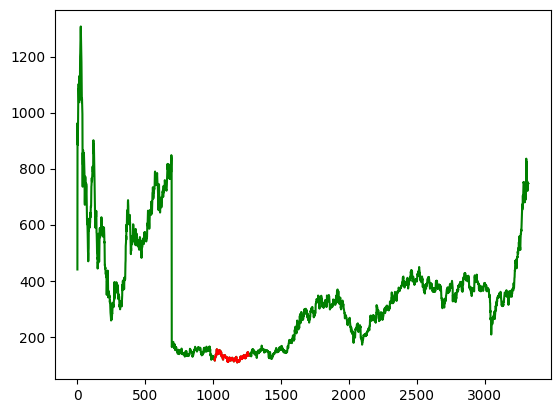

In [20]:
pl = df['Prev Close'].plot(color='green')
stockprice_one_year['Prev Close'].plot(axes=pl, color='red')

<Axes: >

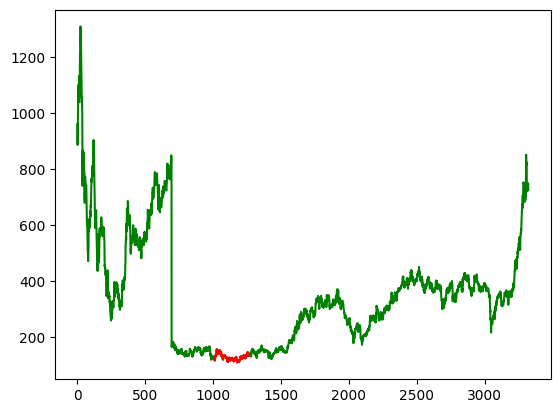

In [21]:
pl = df['Last'].plot(color='green')
stockprice_one_year['Prev Close'].plot(axes=pl, color='red')

<Axes: >

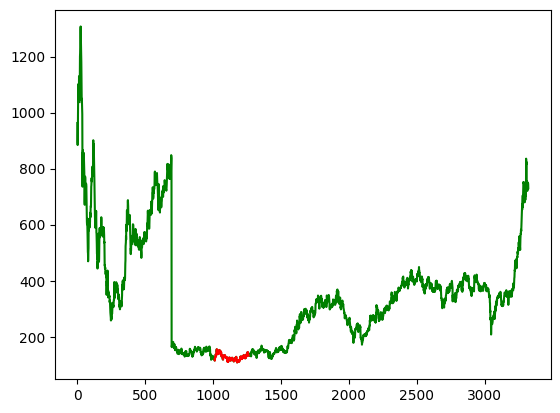

In [22]:
pl = df['Close'].plot(color='green')
stockprice_one_year['Prev Close'].plot(axes=pl, color='red')

<Axes: >

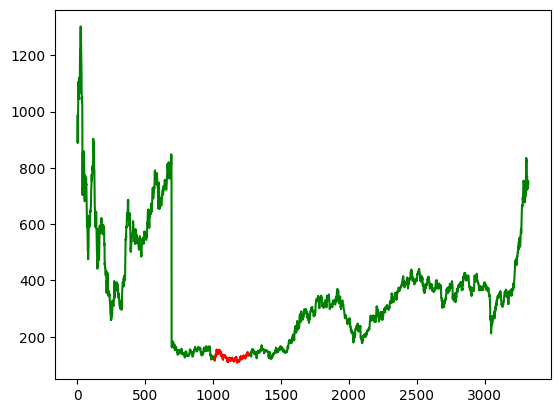

In [23]:
pl = df['VWAP'].plot(color='green')
stockprice_one_year['VWAP'].plot(axes=pl, color='red')

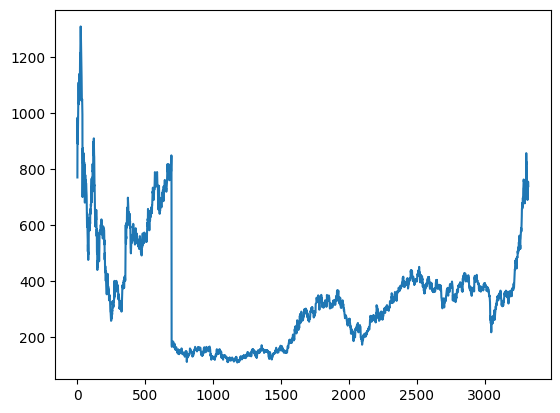

In [24]:
plt.plot(df['Open'])

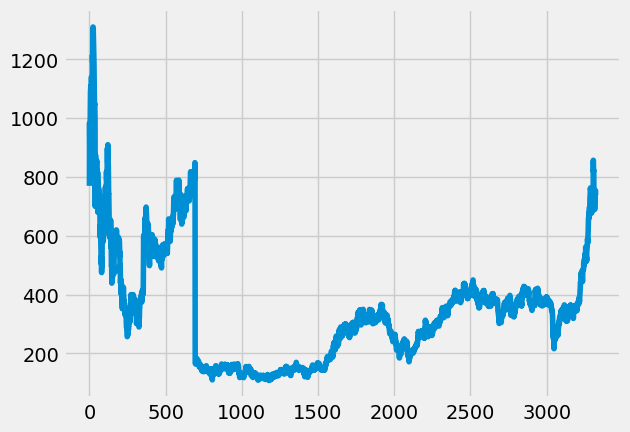

In [25]:
plt.style.use('fivethirtyeight')
plt.plot(df['Open'])

<Axes: xlabel='Date'>

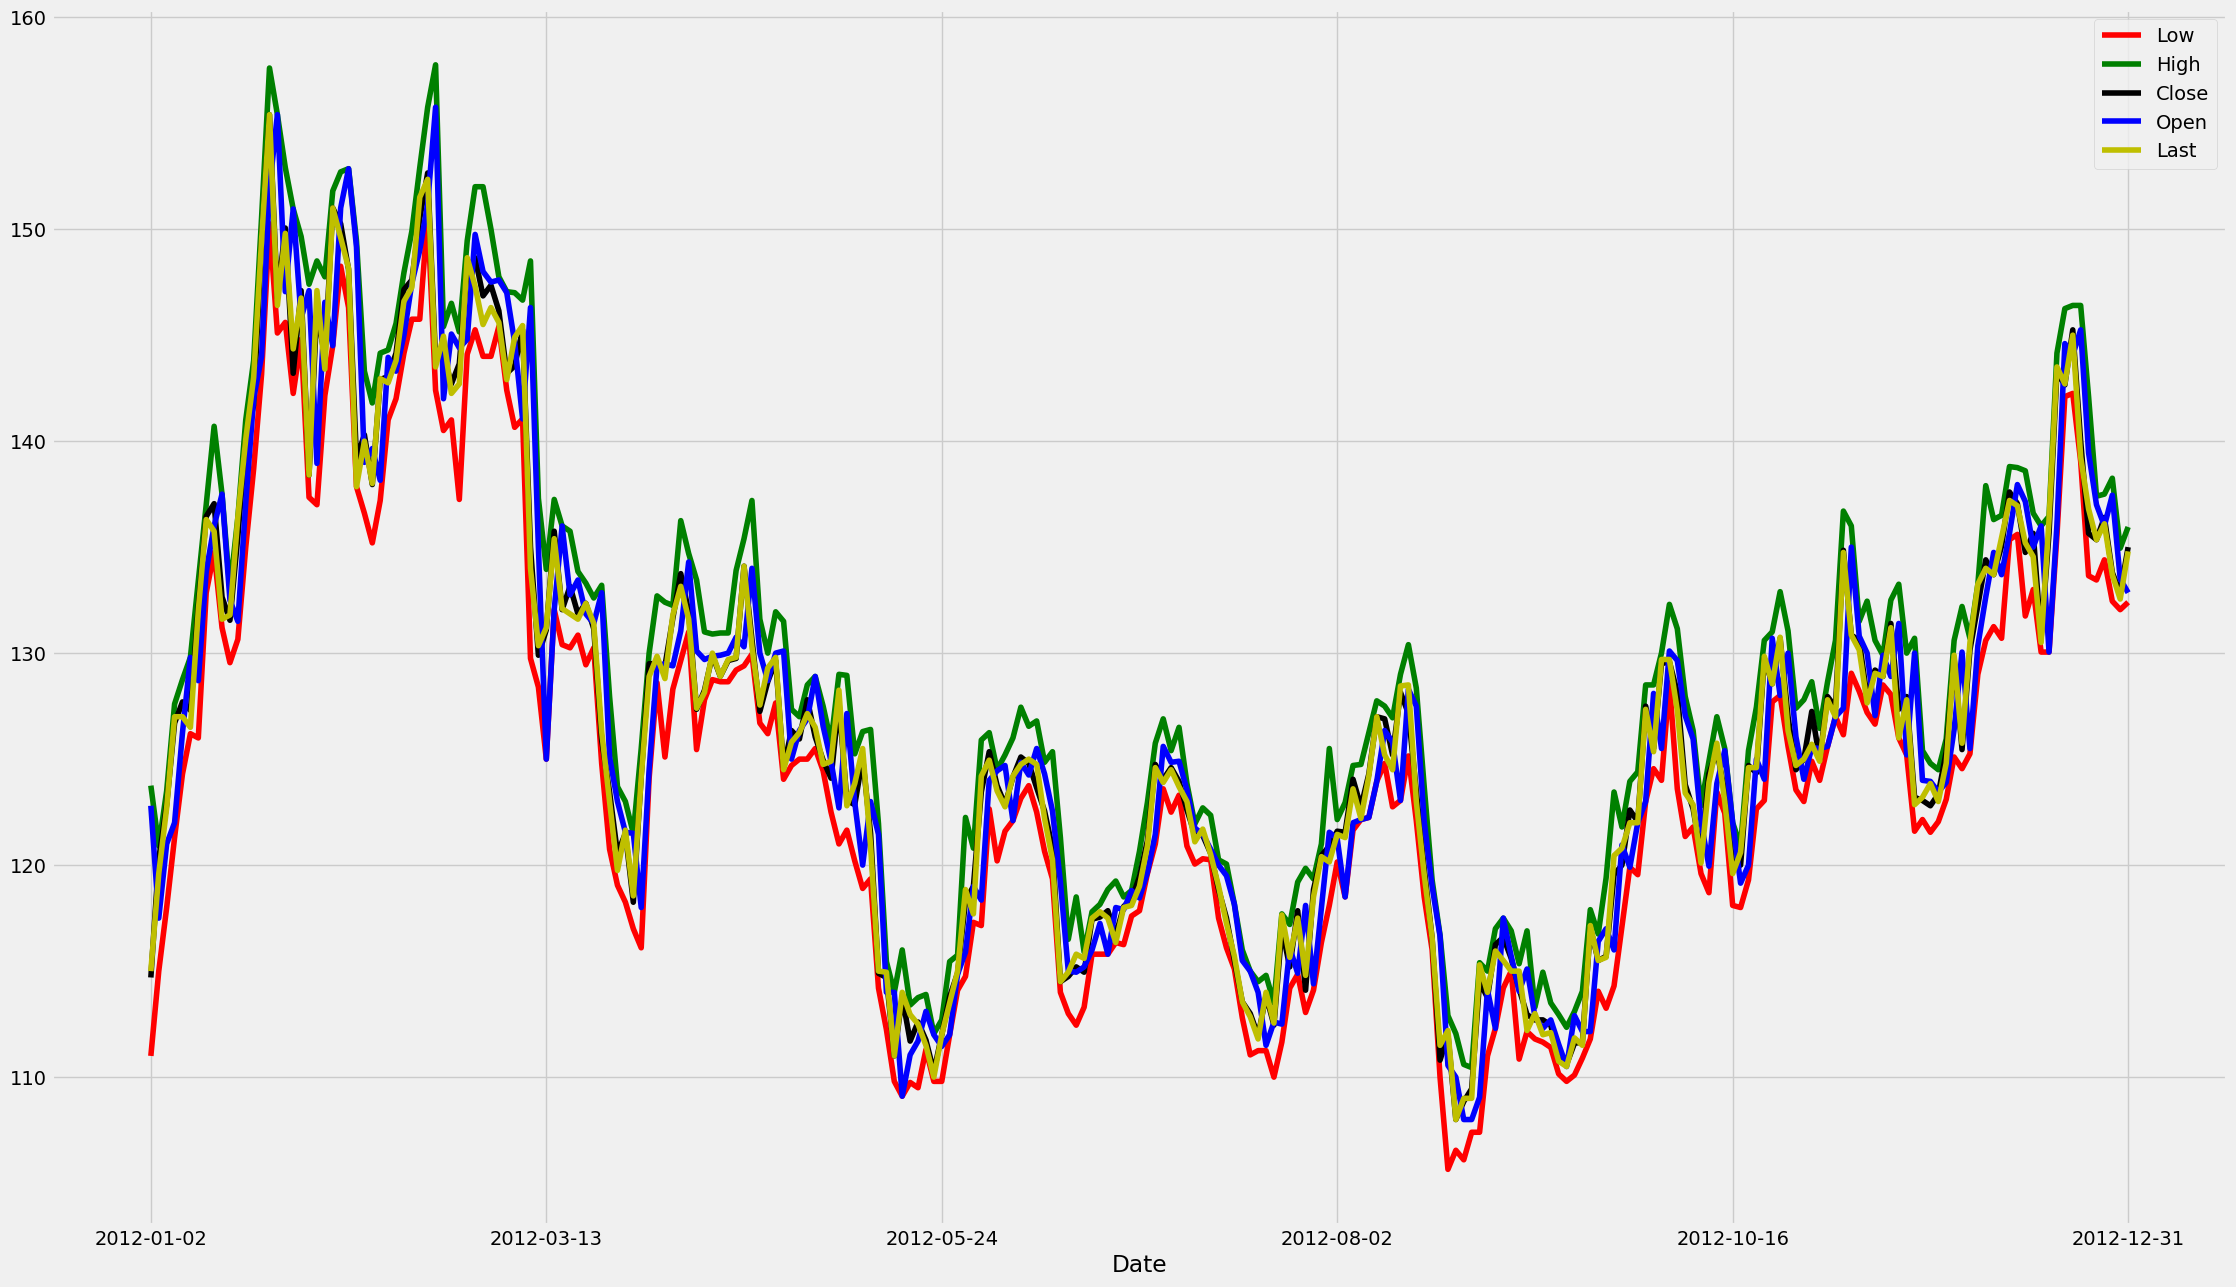

In [32]:
stockprice_one_year.plot(x='Date', y=["Low","High","Close","Open","Last"],color = ['r','g','k','b','y'], figsize = [25,15])

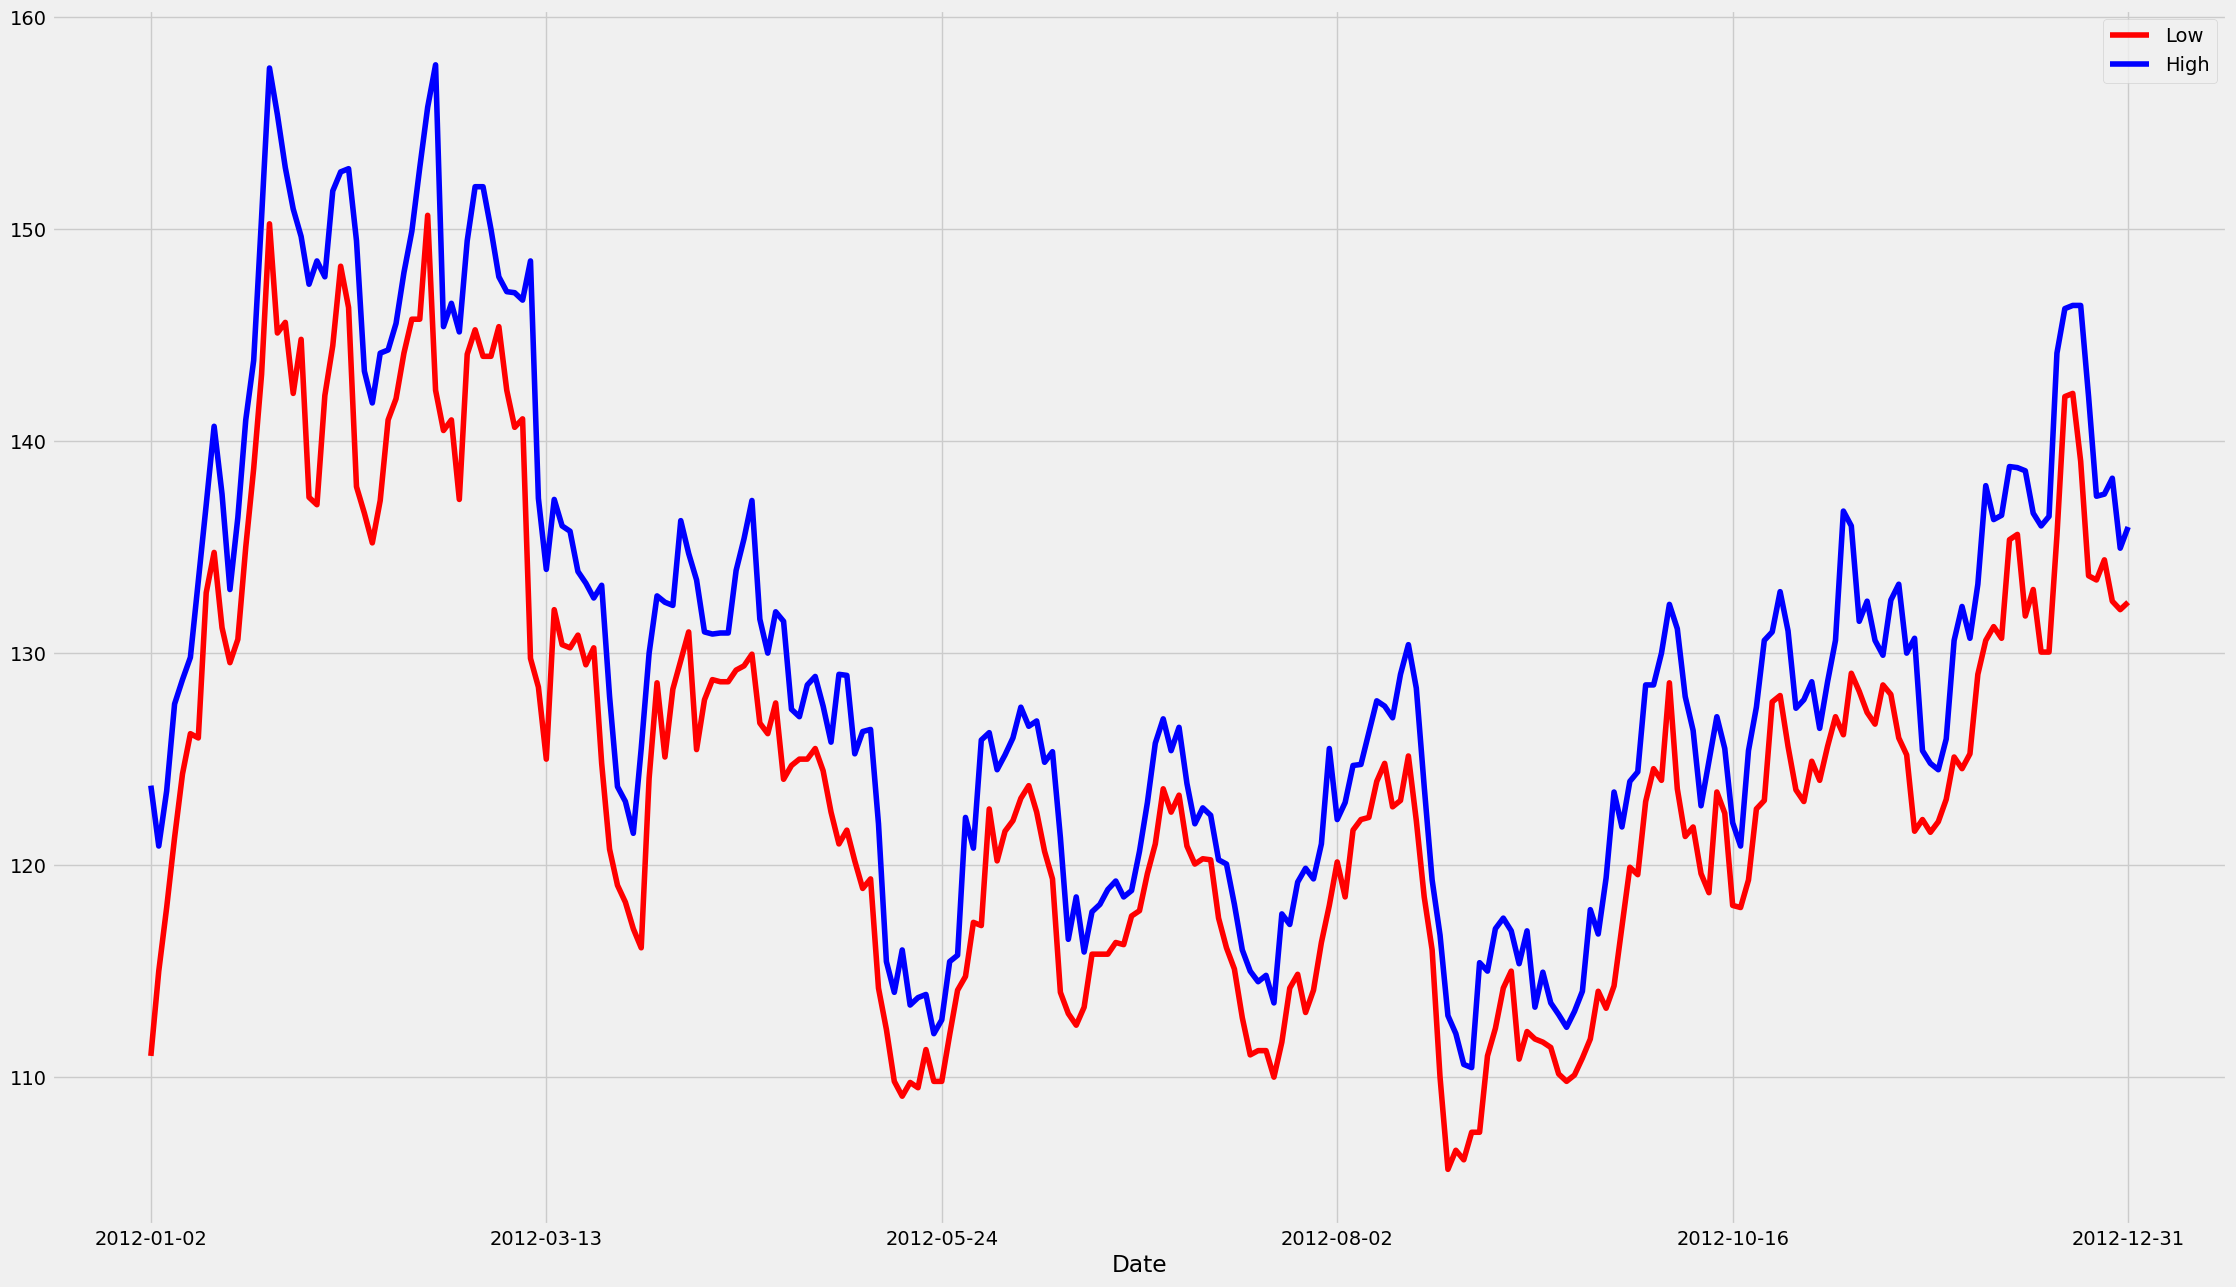

In [34]:
stockprice_one_year.plot(x='Date', y=["Low","High"],color = ['r','b'], figsize = [25,15])
plt.show()

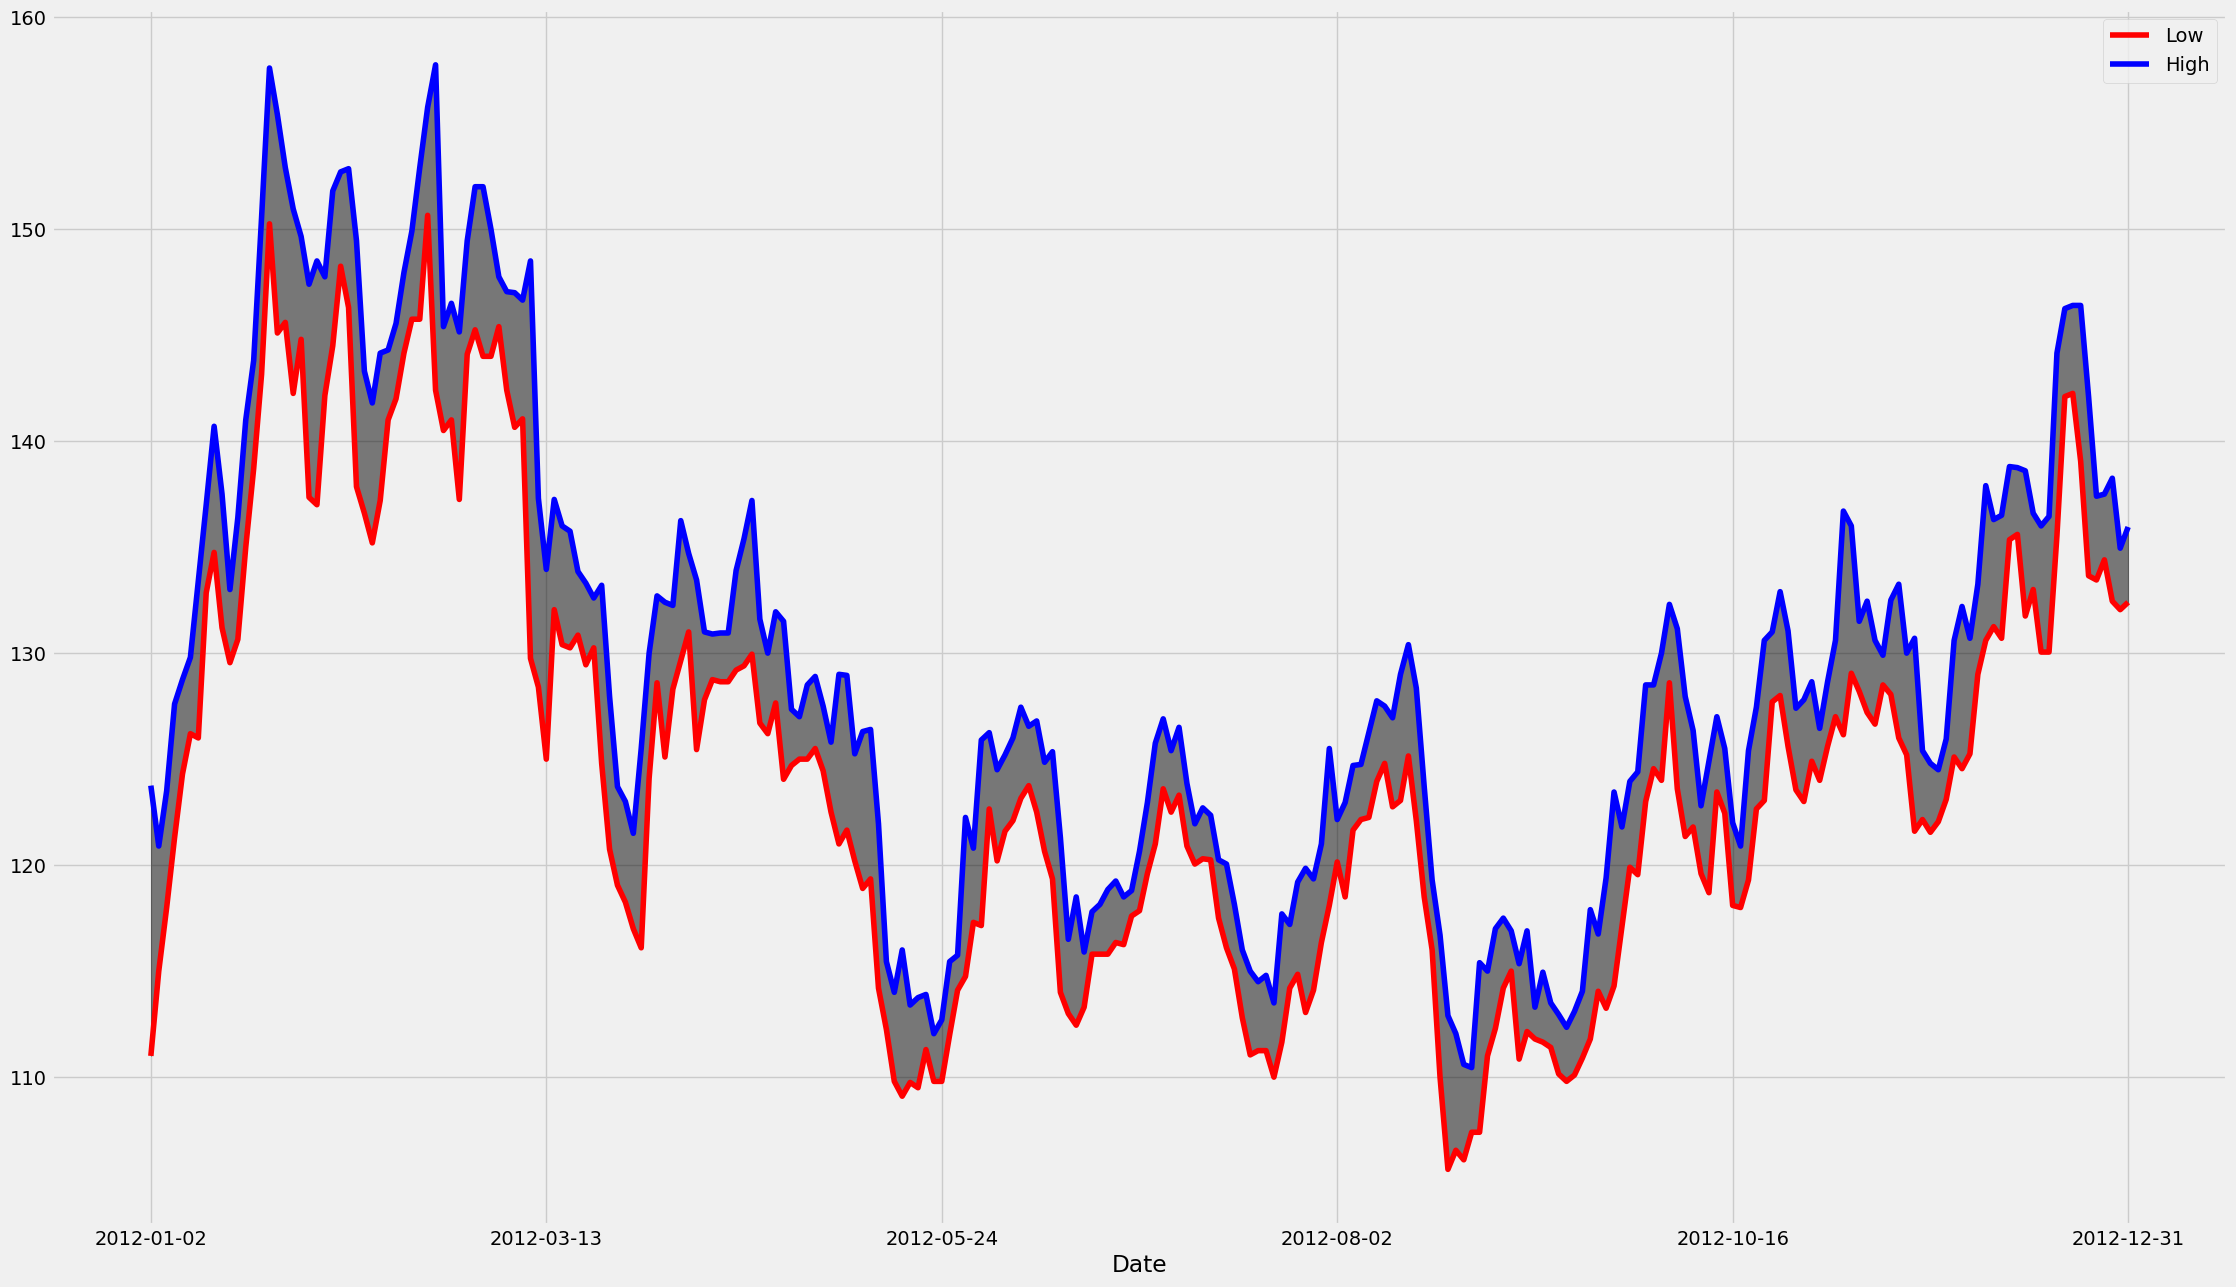

In [35]:
stockprice_one_year.plot(x='Date', y=["Low","High"],color = ['r','b'], figsize = [25,15])
plt.fill_between(stockprice_one_year['Date'], stockprice_one_year['Low'], stockprice_one_year['High'], color='k',alpha=0.5)
plt.show()

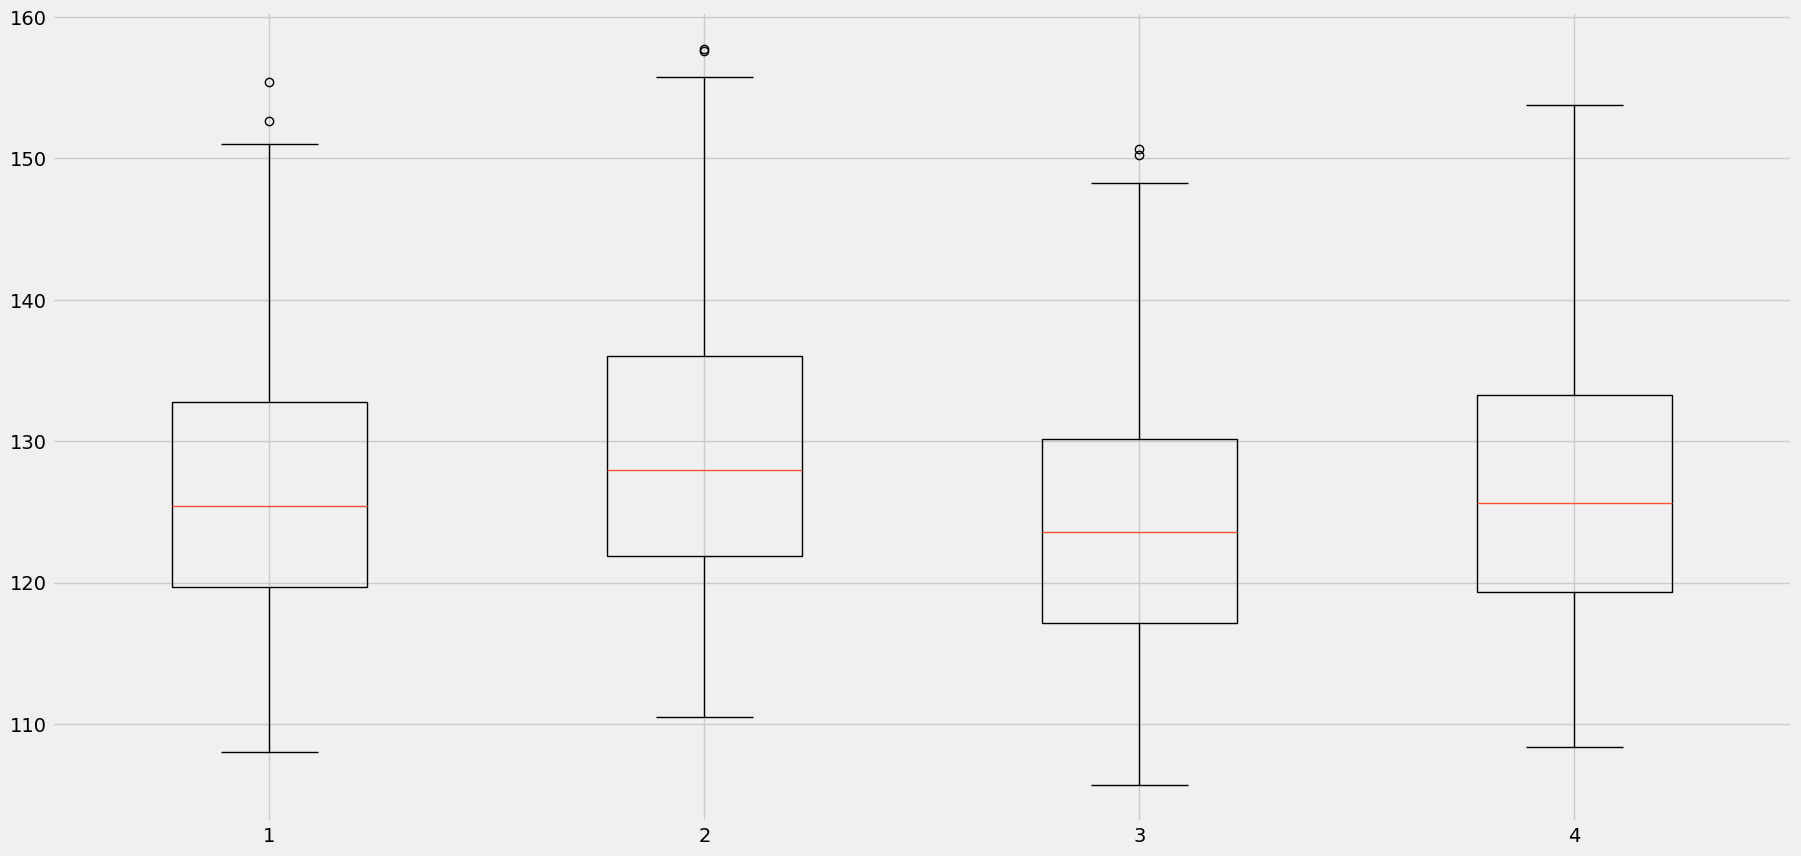

In [37]:
plt.figure(figsize=(20,10))
plt.boxplot(stockprice_one_year[['Close','High','Low','VWAP']])
plt.show()

**Feature Engineering**

In [38]:
data = df[['Date','Open','High','Low','Volume','VWAP']]

**Setting Index as data**

In [41]:
df.set_index("Date", drop=False, inplace=True)

<Axes: xlabel='Date'>

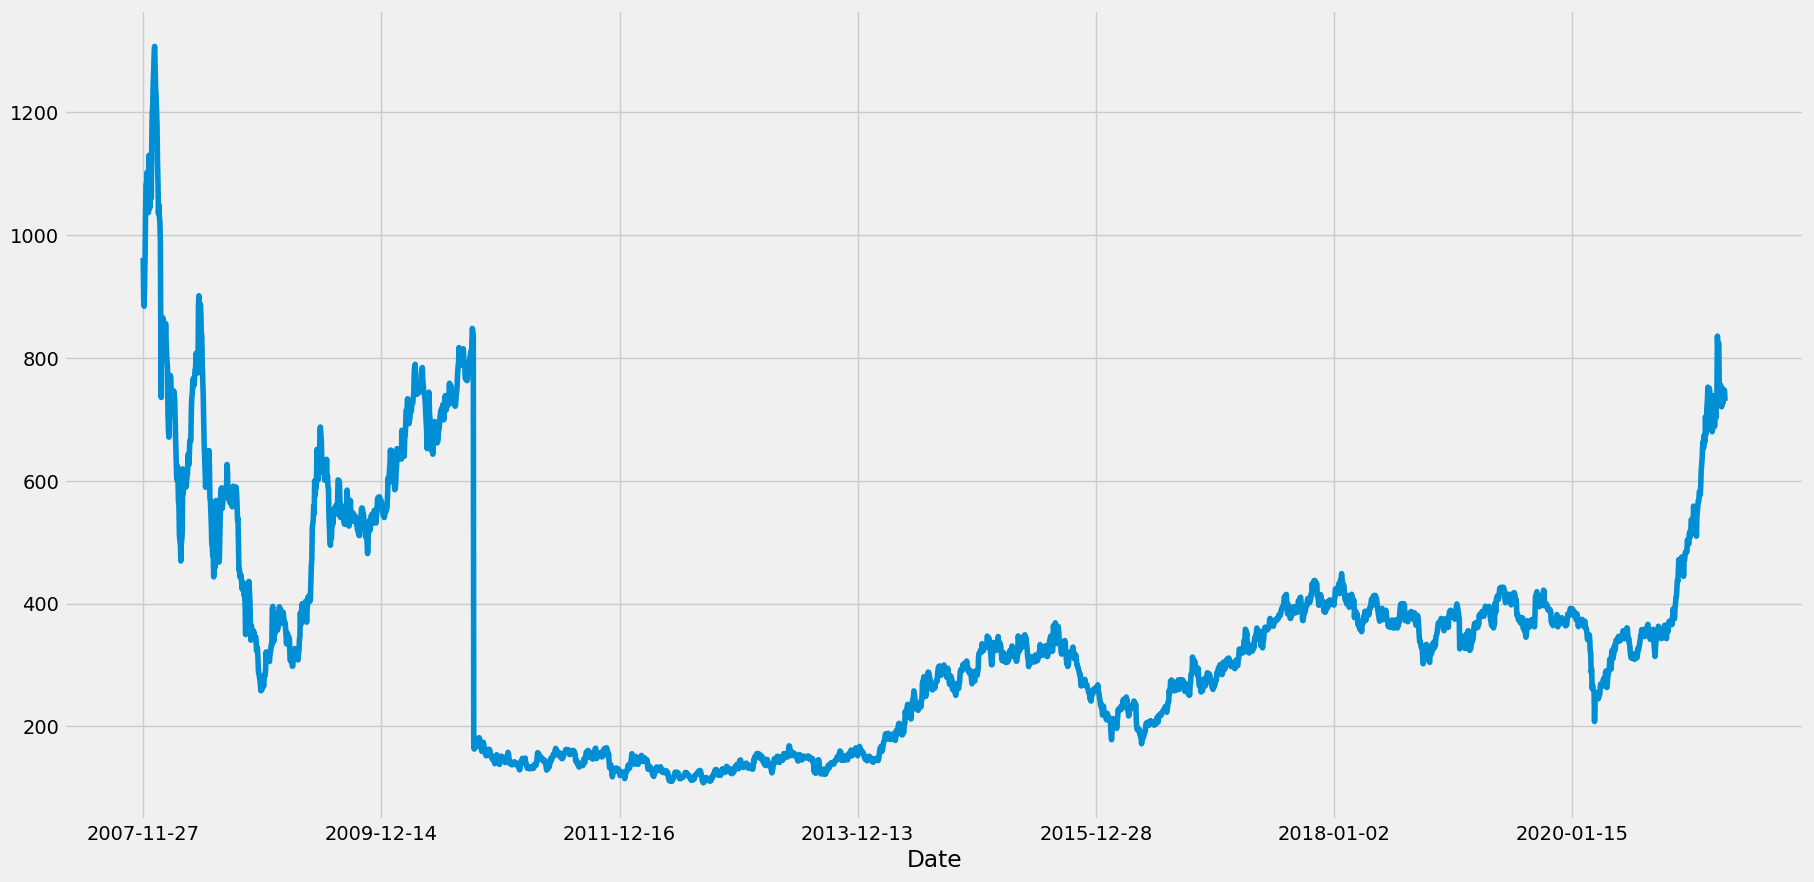

In [42]:
df.Close.plot(figsize=(20,10))

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3322 non-null   object 
 1   Open    3322 non-null   float64
 2   High    3322 non-null   float64
 3   Low     3322 non-null   float64
 4   Volume  3322 non-null   int64  
 5   VWAP    3322 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 155.8+ KB


In [44]:
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


**Extracting Data Time Feature from the dataset**

In [45]:
df.Date = pd.to_datetime(df.Date, format='%Y-%M-%d')
df["month"] = df.Date.dt.month
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,
2007-11-27,2007-01-27 00:11:00,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612,1,27,5
2007-11-28,2007-01-28 00:11:00,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172,1,28,6
2007-11-29,2007-01-29 00:11:00,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088,1,29,0
2007-11-30,2007-01-30 00:11:00,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735,1,30,1
2007-12-03,2007-01-03 00:12:00,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741,1,3,2


**Removing Unnecceasry Features**

In [46]:
df = df.drop(columns=['Symbol'])
df = df.drop(columns=['Series'])

**Spliting Dataset into Training and Testing Data**

In [48]:
df_train = df[df.Date < "2018"]
df_valid = df[df.Date >= "2018"]

In [49]:
df_valid.shape

(823, 16)

In [50]:
!pip install keras
import tensorflow
from sklearn.preprocessing import MinMaxScaler

In [51]:
df_train.head().T

Date,2007-11-27,2007-11-28,2007-11-29,2007-11-30,2007-12-03
Date,2007-01-27 00:11:00,2007-01-28 00:11:00,2007-01-29 00:11:00,2007-01-30 00:11:00,2007-01-03 00:12:00
Prev Close,440.0,962.9,893.9,884.2,921.55
Open,770.0,984.0,909.0,890.0,939.75
High,1050.0,990.0,914.75,958.0,995.0
Low,770.0,874.0,841.0,890.0,922.0
Last,959.0,885.0,887.0,929.0,980.0
Close,962.9,893.9,884.2,921.55,969.3
VWAP,984.72,941.38,888.09,929.17,965.65
Volume,27294366,4581338,5124121,4609762,2977470
Turnover,2687719053785000.0,431276530165000.0,455065846265000.0,428325662830000.0,287519974300000.0


**Importing XGBoost Libarary**

In [52]:
!pip install xgboost
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance

In [53]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.01)
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

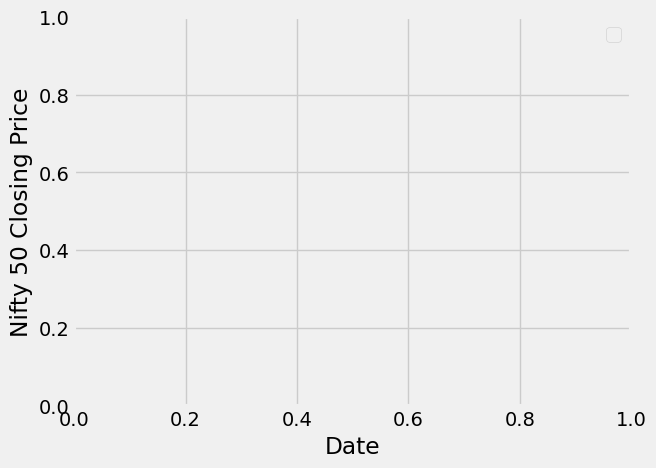

In [55]:
plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()